In [95]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [96]:
train_df = pd.read_csv('train.csv')

In [97]:
# Feature Selection
selected_features = ['MSSubClass', 'LotFrontage','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageArea', 'GarageCars','FullBath', 'GrLivArea', '1stFlrSF', 'LotArea']
X = train_df[selected_features]
y = train_df['SalePrice']  # Assuming 'Price' is your target variable

# Data Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [98]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_valid_imputed = imputer.transform(X_valid)

# Create and train the model with adjusted hyperparameters
svr = SVR(kernel='rbf', C=5e3, gamma=0.05)
svr.fit(X_train_imputed, y_train)

# Prediction and Evaluation
y_pred = svr.predict(X_valid_imputed)
mse = mean_squared_error(y_valid, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 2270498640.792678


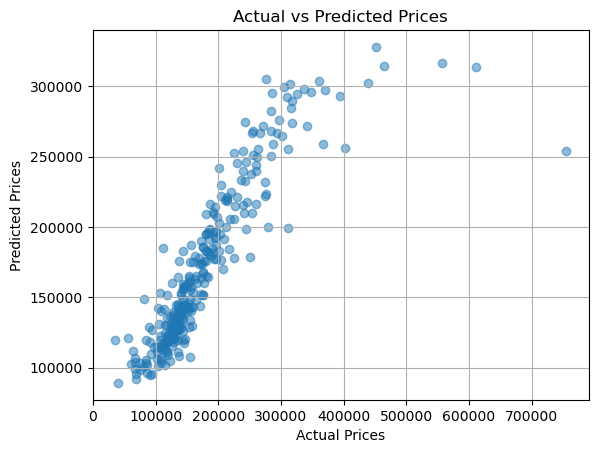

In [99]:
# Plotting actual vs predicted prices
plt.scatter(y_valid, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()
